In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
from glob import glob
import numpy as np
import time
import xarray as xr
import random

In [2]:
def Make_dire(file_path):
    if not os.path.isdir(file_path):
        os.makedirs(file_path)

In [8]:
Bet_path = '/bettik/bouissob/'

files = glob(os.path.join(Bet_path, 'Data/') + '*Ocean1*')

In [10]:
pd.read_csv(files[0])

,y,x,meltRate,thermalDriving,halineDriving,iceDraft,date,temperatureYZ,salinityYZ
0,0,194,1.445518e-09,0.009086,0.127754,82.815510,0,-1.900000,33.813705
1,0,316,2.533100e-09,0.013837,0.194261,91.276440,0,-1.900000,33.813705
2,2,194,1.421181e-09,0.008926,0.125516,81.651650,0,-1.900000,33.813770
3,2,294,2.025993e-09,0.012627,0.177358,89.908270,0,-1.900000,33.813770
4,2,296,1.932426e-09,0.012012,0.168752,90.281364,0,-1.900000,33.813770
...,...,...,...,...,...,...,...,...,...
697915,76,314,2.370411e-07,0.080768,1.095842,100.000000,239,-1.744817,33.694328
697916,76,316,3.454754e-07,0.098296,1.324571,106.927826,239,-1.744817,33.694328
697917,76,318,2.071392e-07,0.037772,0.521274,100.000000,239,-1.744817,33.694328
697918,78,194,4.374625e-08,0.060759,0.831188,82.566990,239,-1.771173,33.690521


In [4]:
multi = 1
if multi == 1:
    Datas = glob(Bet_path + '/Data/*S.csv')
    Clean_Data = pd.DataFrame()
    for ind, d in enumerate(Datas):
        print('{}/{}'.format(ind, len(Datas)))
        data = pd.read_csv(d)
        print(d)
        Clean_Data = pd.concat([Clean_Data, data],ignore_index = True)
    del data
else:
    Datas = glob(os.getcwd() + '/Data/*.nc.csv')
    Data = pd.read_csv(Datas[0])
    Clean_Data = Data.dropna()
    Clean_Data.reset_index(inplace=True, drop = True)


In [5]:
Clean_Data

,y,x,meltRate,thermalDriving,halineDriving,iceDraft,date
0,0,194,1.445518e-09,0.009086,0.127754,82.815510,0
1,0,316,2.533100e-09,0.013837,0.194261,91.276440,0
2,2,194,1.421181e-09,0.008926,0.125516,81.651650,0
3,2,294,2.025993e-09,0.012627,0.177358,89.908270,0
4,2,296,1.932426e-09,0.012012,0.168752,90.281364,0
...,...,...,...,...,...,...,...
697915,76,314,2.370411e-07,0.080768,1.095842,100.000000,239
697916,76,316,3.454754e-07,0.098296,1.324571,106.927826,239
697917,76,318,2.071392e-07,0.037772,0.521274,100.000000,239
697918,78,194,4.374625e-08,0.060759,0.831188,82.566990,239


In [5]:
Cols = Clean_Data.columns
Var_names_X = Cols.drop(['date', 'meltRate'])

In [6]:
X = Clean_Data[Var_names_X]
Y = Clean_Data['meltRate']
X_train = X.sample(frac = 0.8)
X_valid = X.drop(X_train.index)

Y_train = Y.loc[X_train.index]
Y_valid = Y.drop(X_train.index)
print(len(X_train), len(X_valid))

#mean, std = X_train.mean(), X_train.std() 
#meanY, stdY = Y_train.mean(), Y_train.std() 

maxX, minX = X_train.max(), X_train.min()
maxY, minY = Y_train.max(), Y_train.min()
X_train, X_valid = np.array((X_train - minX)/(maxX - minX)), np.array((X_valid - minX)/(maxX - minX))
Y_train, Y_valid = np.array((Y_train - minY)/(maxY - minY)), np.array((Y_valid - minY)/(maxY - minY))
#Y_train_N, Y_valid_N = np.array(Y_train / maxY), np.array(Y_valid/maxY)

558336 139584


In [7]:
A = (X - minX)/(maxX - minX)
A.min()

y                 0.0
x                 0.0
thermalDriving    0.0
halineDriving     0.0
iceDraft          0.0
dtype: float64

In [8]:
def Model_init(shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape))
    model.add(tf.keras.layers.Dense(32, activation = 'relu'))
    model.add(tf.keras.layers.Dense(64, activation = 'relu'))
    model.add(tf.keras.layers.Dense(64, activation = 'relu'))
    model.add(tf.keras.layers.Dense(32, activation = 'relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam',
                 loss = 'mse',
                metrics = ['mae', 'mse'])
    return model
def Model_init2(shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape))
    model.add(tf.keras.layers.Dense(32, activation = 'swish'))
    model.add(tf.keras.layers.Dense(64, activation = 'swish'))
    model.add(tf.keras.layers.Dense(64, activation = 'swish'))
    model.add(tf.keras.layers.Dense(32, activation = 'swish'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam',
                 loss = 'mse',
                metrics = ['mae', 'mse'])
    return model

In [9]:
if len(Datas) ==1:
    Temp = Datas[0].split('/')
    Name = Temp[len(Temp) - 1]
    Name = Name.replace('data_', '')
    Ocean_scen = Name.split('_')[0]
    Mod_nam = Name.replace(Ocean_scen + '_', '').split('.')[0]
else:
    Names = []
    for n in Datas:
        Temp = n.split('/')
        Name = Temp[len(Temp) - 1]
        Name = Name.replace('data_', '')
        Ocean_scens = Name.split('_')[0]
        Names.append(Ocean_scens)
    Ocean_scen = '_'.join(Names)
    Mod_nam = Name.replace(Ocean_scens + '_', '').split('.')[0]
        

In [10]:
Ocean_scen

'Ocean1'

In [11]:
Model_path = '/'.join([os.getcwd(),'Models',Mod_nam, Ocean_scen])

In [12]:
Model_path

'/home/bouissob/Code/Models/COM_NEMO-CNRS/Ocean1'

In [13]:
Nbr_Epoch = 3

Uniq = time.time()

Name ='Ep_{}_Input_{}_{}'.format(Nbr_Epoch, len(Var_names_X), Uniq)
filepath = Model_path + '/' + Name + '/'
Make_dire(filepath)
maxX.to_pickle(filepath + 'MaxX.pkl')
minX.to_pickle(filepath + 'MinX.pkl')
np.savetxt(filepath + 'MaxY.csv', np.array(maxY).reshape(1, ))
np.savetxt(filepath + 'MinY.csv', np.array(minY).reshape(1, ))
model = Model_init( (len(Var_names_X), ))
Model = model.fit(X_train, Y_train,
                   epochs = Nbr_Epoch,
                   batch_size = 32,
                   validation_data = (X_valid, Y_valid))
Model_path = os.getcwd() + '/Models/' + Mod_nam + '/' + Ocean_scen + '/'
model.save(filepath + 'model.h5')
del X_train, Y_train
del X_valid, Y_valid

2022-02-22 21:10:32.037827: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-22 21:10:32.038291: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-22 21:10:32.040852: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-02-22 21:10:32.225754: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-22 21:10:32.246022: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2300150000 Hz


Epoch 1/3
17448/17448 [==============================] - 35s 2ms/step - loss: 0.0018 - mae: 0.0184 - mse: 0.0018 - val_loss: 3.6795e-04 - val_mae: 0.0094 - val_mse: 3.6795e-04
Epoch 2/3
17448/17448 [==============================] - 30s 2ms/step - loss: 5.1389e-04 - mae: 0.0108 - mse: 5.1389e-04 - val_loss: 3.4175e-04 - val_mae: 0.0094 - val_mse: 3.4175e-04
Epoch 3/3
17448/17448 [==============================] - 29s 2ms/step - loss: 3.4357e-04 - mae: 0.0092 - mse: 3.4357e-04 - val_loss: 2.2429e-04 - val_mae: 0.0080 - val_mse: 2.2429e-04


In [ ]:
Datas = glob(os.getcwd() + '/Data/*.nc.csv')
Data = pd.read_csv(Datas[0])
Clean_Data = Data.dropna()
Clean_Data.reset_index(inplace=True)

In [ ]:
X = Clean_Data[Var_names_X]
X = np.array((X - mean)/std)
X = np.array(X).reshape(-1, 5, )
Y_mod = Model.model(X)
#Data['Mod_Melt'] = Y_mod.numpy().reshape(len(Y_mod, )) * maxY
Data['Mod_Melt'] = (Y_mod.numpy().reshape(len(Y_mod, )) * stdY) + meanY
Dataset = Data.set_index(['y', 'x'])
Dataset = Dataset.to_xarray()
Dataset.Mod_Melt.plot(cmap = plt.get_cmap('viridis'))
plt.figure()
Dataset.meltRate.plot(cmap = plt.get_cmap('viridis'))

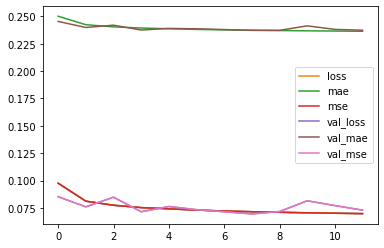

In [18]:
hist = Model.history
plt.plot(hist['loss'])
for k in hist.keys():
    plt.plot(hist[k], label = k)
plt.legend()
plt.show()